# PyCaret 2 Anomaly Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

2.0


# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


# 2. Initialize Setup

In [3]:
from pycaret.anomaly import *
ano1 = setup(data, session_id=123, log_experiment=True, experiment_name='anomaly1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(1000, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(1000, 10)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


2020/07/31 08:49:05 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: No module named 'repository'


# 3. Create Model

In [4]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
iforest,Isolation Forest,pyod.models.iforest
cluster,Clustering-Based Local Outlier,pyod.models.cblof
cof,Connectivity-Based Outlier Factor,pyod.models.cof
histogram,Histogram-based Outlier Detection,pyod.models.hbos
knn,k-Nearest Neighbors Detector,pyod.models.knn
lof,Local Outlier Factor,pyod.models.lof
svm,One-class SVM detector,pyod.models.ocsvm
pca,Principal Component Analysis,pyod.models.pca


In [5]:
iforest = create_model('iforest')

In [6]:
knn = create_model('knn', fraction = 0.1)

# 4. Assign Labels

In [7]:
iforest_results = assign_model(iforest)
iforest_results.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Label,Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408


# 5. Analyze Model

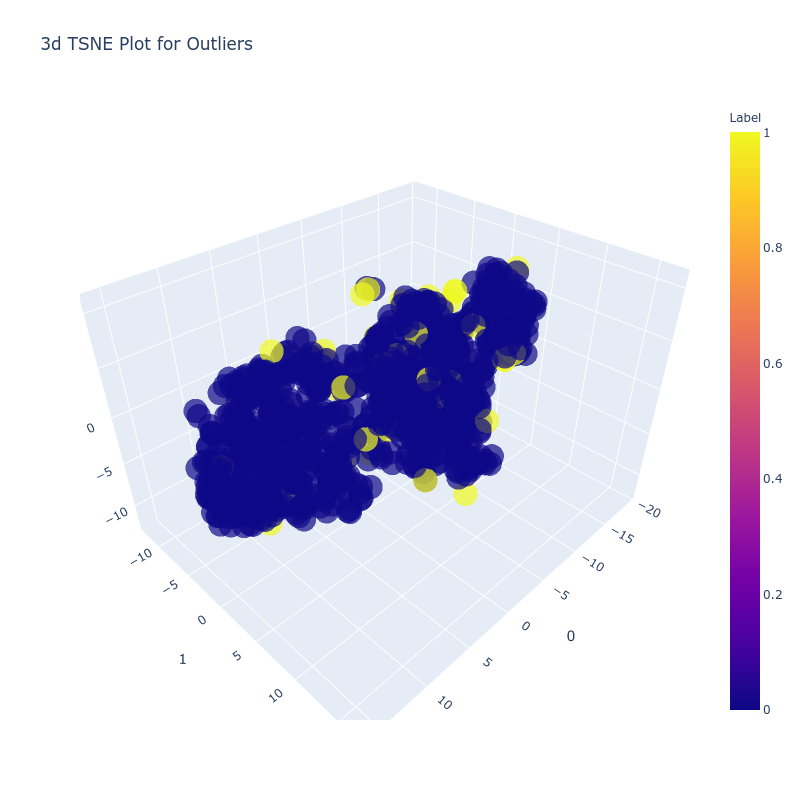

In [8]:
plot_model(iforest)

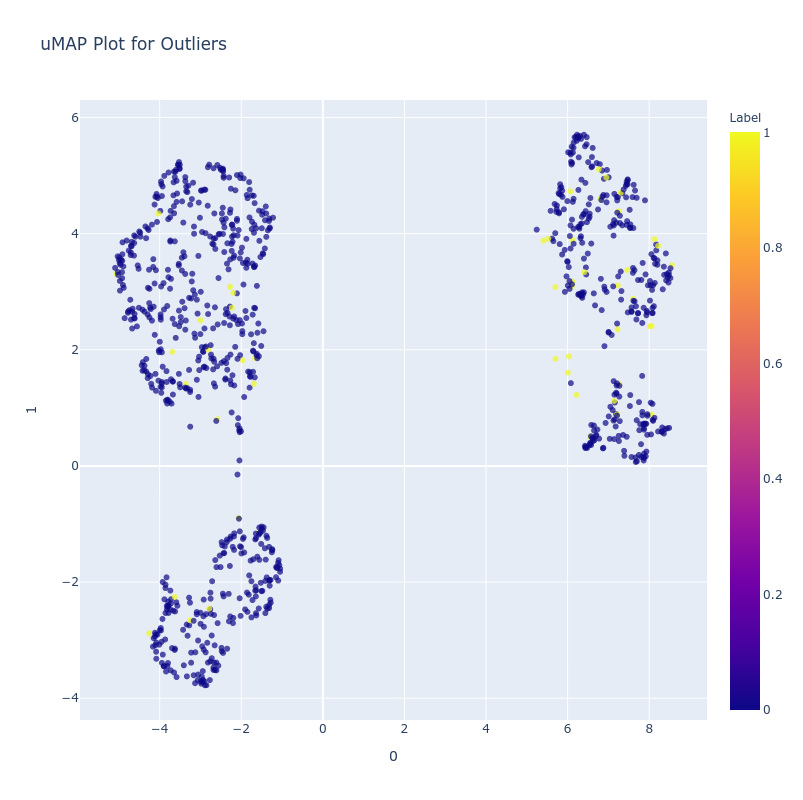

In [9]:
plot_model(iforest, plot = 'umap')

# 6. Predict Model

In [10]:
pred_new = predict_model(iforest, data=data)
pred_new.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Label,Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408


# 7. Save / Load Model

In [11]:
save_model(iforest, model_name='iforest')

Transformation Pipeline and Model Succesfully Saved


In [12]:
loaded_iforest = load_model('iforest')
print(loaded_iforest)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
                ('group', Empty()), ('scalin

In [13]:
from sklearn import set_config
set_config(display='diagram')
loaded_iforest[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
                ('group', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('binn', Empty()),
                ('fix_perfect', Empty()), ('rem_outliers', Empty()),
                ('dummy', Dummify(target='dummy_target')),
                ('clean_names', Clean_Colum_Names()), ('fix_multi', Empty()),
                ('pca', Empty())],
         verbose=False)

In [14]:
from sklearn import set_config
set_config(display='text')

# 8. Deploy Model

In [15]:
deploy_model(iforest, model_name = 'iforest-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 9. Get Config / Set Config

In [16]:
X = get_config('X')
X.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [17]:
get_config('seed')

123

In [18]:
from pycaret.anomaly import set_config
set_config('seed', 999)

In [19]:
get_config('seed')

999

# 10. MLFlow UI

In [ ]:
!mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org